# Clustering Models

## K Means

**K-means clustering** is an unsupervised machine learning algorithm that can be used to predict subgroups within an unlabeled dataset. Using K-means clustering aids in having an idea of how many subgroups are appropriate.  

Predictions are based on the number of centroids present as represented by the unit *k* and nearest mean values, given a Euclidean distance measurement between observations. 

Things to keep in mind when using K-means:
- Scale variables
- Use scatter plot or the data table to estimate the appropriate number of centroids to use for the k parameter value.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as sk
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

In [13]:
%matplotlib inline
plt.figure(figsize=(7,4))

<Figure size 700x400 with 0 Axes>

<Figure size 700x400 with 0 Axes>

In [15]:
iris = datasets.load_iris()

x = scale(iris.data)
y = pd.DataFrame(iris.target, columns=['Target'])

variables = iris.feature_names

In [16]:
kmeans_model = KMeans(n_clusters= 3, random_state= 5)

kmeans_model.fit(x)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,5
,copy_x,True
,algorithm,'lloyd'


In [17]:
iris_ = pd.DataFrame(iris.data, columns = variables)

iris_.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Text(0.5, 1.0, 'K-Means Classification')

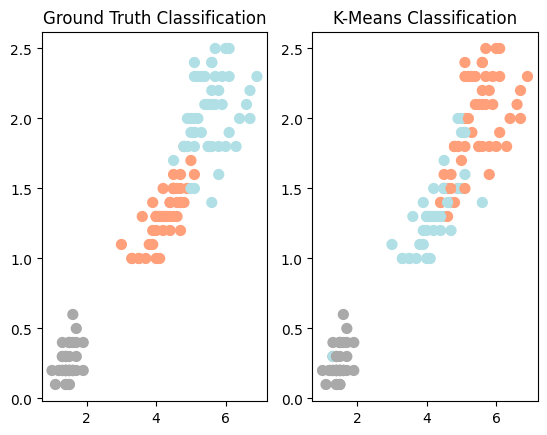

In [23]:
plt.subplot(1,2,1)

plt.scatter(x = iris_['petal length (cm)'], y = iris_['petal width (cm)'],
            c = np.array(['darkgrey', 'lightsalmon', 'powderblue'])[iris.target], s = 50)

plt.title('Ground Truth Classification')

plt.subplot(1,2,2)

plt.scatter(x = iris_['petal length (cm)'], y = iris_['petal width (cm)'],
            c = np.array(['darkgrey', 'lightsalmon', 'powderblue'])[kmeans_model.labels_], s = 50)

plt.title('K-Means Classification')

In [24]:
relabel = np.choose(kmeans_model.labels_, [0, 2, 1]).astype(np.int64)

Text(0.5, 1.0, 'K-Means Classification')

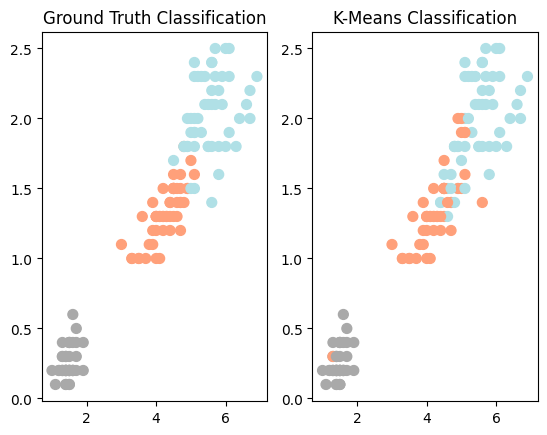

In [25]:
plt.subplot(1,2,1)

plt.scatter(x = iris_['petal length (cm)'], y = iris_['petal width (cm)'],
            c = np.array(['darkgrey', 'lightsalmon', 'powderblue'])[iris.target], s = 50)

plt.title('Ground Truth Classification')

plt.subplot(1,2,2)

plt.scatter(x = iris_['petal length (cm)'], y = iris_['petal width (cm)'],
            c = np.array(['darkgrey', 'lightsalmon', 'powderblue'])[relabel], s = 50)

plt.title('K-Means Classification')

In [26]:
print(classification_report(y, relabel))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.80      0.74      0.77        50
           2       0.76      0.84      0.80        50

    accuracy                           0.85       150
   macro avg       0.86      0.85      0.85       150
weighted avg       0.86      0.85      0.85       150



**Precision:** a measure of the model's relevancy. For all the points predicted to have (0) label, 100% were relevant. 2 -> 76%

**Recall:** a measure of the model's completeness.

## Hierarchical Cluster Analysis

**Hierarchical clustering** is an unsupervised machine learning method that can be used to predict subgroups based on the difference between data points, and their nearest neighbors. Hierarchical clustering methods predict subgroups within data by finding the distance between each data point and its nearest neighbors, and then linking the most nearby neighbors. Each data point is linked to its neighbor that is most nearby according to the distance metric that you chose.

The number of subgroups that are appropriate for a hierarchical clustering model can be found by looking at a dendrogram. A *dendrogram* is a tree graph that's useful for visually displaying taxonomies, lineages, and relatedness. 

**Important model parameters:**
- Distance Metrics:
    - Euclidean
    - Manhattan
    - Cosine
- Linkage Parameters:
    - Ward
    - Complete
    - Average

In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns

import sklearn as sk
import sklearn.metrics as sm
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet
from scipy.spatial.distance import pdist

In [16]:
np.set_printoptions(precision = 4, suppress = True)
plt.figure(figsize = (10,3))

%matplotlib inline
sns.set_style("whitegrid")

<Figure size 1000x300 with 0 Axes>

In [17]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns = iris.feature_names)
y = pd.Series(iris.target)

In [18]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
z = linkage(X, 'ward')

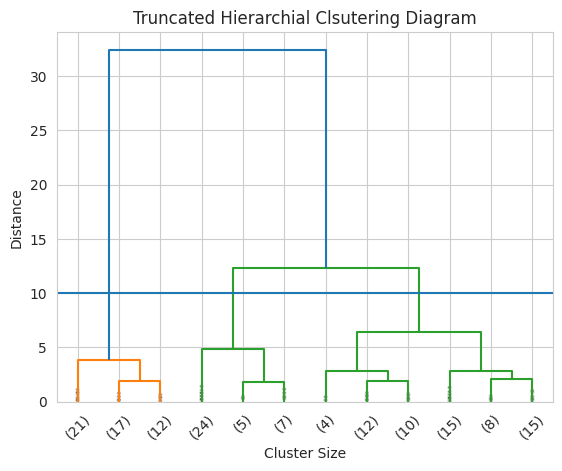

In [20]:
dendrogram(z, truncate_mode = 'lastp', p = 12, leaf_rotation = 45, leaf_font_size = 10, show_contracted = True)

plt.title('Truncated Hierarchial Clsutering Diagram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.axhline(y=10)
plt.show()

In [55]:
k = 3

hier_clust = AgglomerativeClustering(n_clusters = k, metric = 'euclidean', linkage = 'ward')
hier_clust.fit(X)

sm.accuracy_score(y, hier_clust.labels_)


0.23333333333333334

In [56]:
from sklearn.metrics import adjusted_rand_score

# This will likely give you a much higher, more accurate score
ari = adjusted_rand_score(y, hier_clust.labels_)
print(f"Adjusted Rand Index: {ari:.2f}")

Adjusted Rand Index: 0.73


In [58]:
iris_ = X

Text(0.5, 1.0, 'Hierarchical cluster Classification')

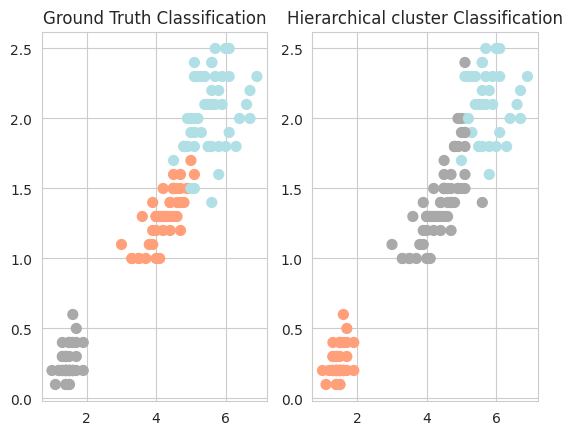

In [60]:
plt.subplot(1,2,1)

plt.scatter(x = iris_['petal length (cm)'], y = iris_['petal width (cm)'],
            c = np.array(['darkgrey', 'lightsalmon', 'powderblue'])[iris.target], s = 50)

plt.title('Ground Truth Classification')

plt.subplot(1,2,2)

plt.scatter(x = iris_['petal length (cm)'], y = iris_['petal width (cm)'],
            c = np.array(['darkgrey', 'lightsalmon', 'powderblue'])[hier_clust.labels_], s = 50)

plt.title('Hierarchical cluster Classification')

## DBSCAN

**DBSCAN** is an unsupervised machine learning method that clusters core samples from dense areas of a dataset and denotes non-core samples from sparse areas of that dataset. 

DBSCAN can be used to identify collective outliers. Make sure that the number of outliers choosen is less than 5% of the total number of observations in the dataset. This can be done by adjusting the model parameters accordingly.  
There are two important DBSCAN model parameters: *eps* and *min_samples*. 
- **eps** is the maximum distance between two samples for them to be clustered in the same neighborhood. Better to start at a value of 0.1. 
- **min_samples** are the minimum number of samples in a neighborhood for a data point to qualify as a core point. Better to start with a very low sample size.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

import sklearn as sk
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.datasets import load_iris

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4

In [3]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)
target = iris.target

In [4]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
dbscan_model = DBSCAN(eps= 0.8, min_samples = 19)
dbscan_model.fit(data)

,eps,0.8
,min_samples,19
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [6]:
outliers_ = pd.DataFrame(iris.data, columns = iris.feature_names)

In [7]:
print(Counter(dbscan_model.labels_))
print(outliers_[dbscan_model.labels_ ==  -1])

Counter({np.int64(1): 94, np.int64(0): 50, np.int64(-1): 6})
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
98                 5.1               2.5                3.0               1.1
105                7.6               3.0                6.6               2.1
117                7.7               3.8                6.7               2.2
118                7.7               2.6                6.9               2.3
122                7.7               2.8                6.7               2.0
131                7.9               3.8                6.4               2.0


Text(0.5, 0, 'Sepal Length')

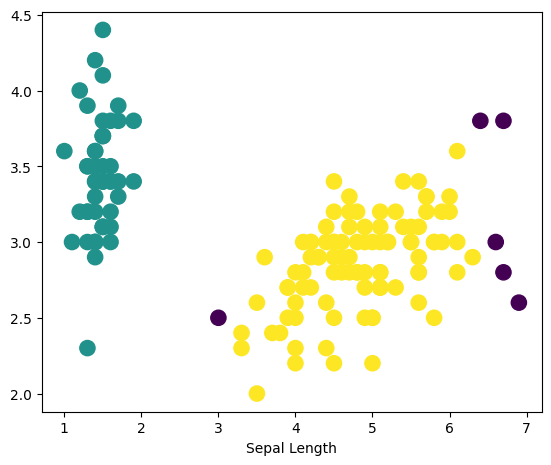

In [28]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 1, 1])

ax.scatter(data.values[:,2], data.values[:, 1], c = dbscan_model.labels_, s =120)

ax.set_xlabel('Petal Length')
ax.set_xlabel('Sepal Length')